# Data Preprocessing Project

Data collection and preprocessing are two most critical stages that can make or mar the accuracy of a Machine learning 
model. preprocessing is the act of preparing, cleaning, and properly formatting data for use in training and testing of 
Machine learning models 
In order to ensure that high-quality data is utilized to train and test machine learning models, this introduction 
discusses the significance of data preparation and identifies important factors that must be taken into account.
By strictly adhering to the data preprocessing best proctice, we can be sure that the models we create are precise, 
robust, and efficient in solving real-world problems.

### Aim of the Project

The aim of this project is to prepare the data ready for the development of a machine learning model. The model's aim would be to predict prices of houses in the Ames area Iowa.

### Data Collection

#### Metadata
The Ames Iowa housing dataset is a public dataset created by Dean De Cock for use in data science teaching, which details 
the sale of individual residential properties in Ames, Iowa, from 2006 to 2010. It was created using the Boston Housing dataset as a model.
#### Disclaimer
There was no bias or conflict of interest in the data collection.

### Project Content
Data Cleaning: Dealing with duplicate data, handling outliers and dealing with any inconsistencies that may exist in the dataset.

Data Transformation: This involves transforming the data into the required format for the analysis, like scaling, normalization,
discretization or converting categorical data to numerical data.

Feature Selection: Selecting the most relevant features from the dataset, and removing any irrelevant or redundant features 
that may not contribute to the model efficiency.

Data Reduction: Reducing the size of the dataset while preserving the most important information.

Data Visualization: Visualizing data to gain insights and identify patterns that could help determine which Machine learning 
algorithm should we use to develop our model

## 1. Removing outliers

The dependencies used in the project are:

Numpy, Pandas, Matplotlib, Seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the project dataset

In [ ]:
df = pd.read_csv('Ames_Housing_Data.csv')

It will always be good to view the dataset's Metadata

In [ ]:
df.info()

From the informaion above, We can see that the dataset has 1930 rows and 81 columns, we can also observe that some columns have null values.

The null values may mean that the house lacks that feature(e.g a pool, fence) or the data was not reported during collection(e.g Year Built), it all depends on the accuracy of the  data collection process and the domain knowledge


#### View the correlation between those features and House Prices

In [ ]:
df.corr()['SalePrice'].sort_values()

We can see that some features exhibit negative correlation with the SalePrice, well, people with the domain knowledge may say that most property buyers have negative view about those features, hence they(negatively correlated features) may negatively affect the house price. There for we can say the scenario is that of Causation.

We can also note that "Overall Qual" and "Gr Liv Area" are the most positively correalted with SalePrice.

Also note that the columns reported above are not up to 81, this shows that their data is not numerical and therefore can not be correlated with SalePrice. We are going to use the "Categorical data encoding" to represent them numerically, because most machine learning algorithsms understand only numerical data.

#### Let us Visualize the relationship between some features in the data frame and the SalePrice

In [ ]:
sns.scatterplot(x='Overall Qual', y= 'SalePrice', data = df)

From the above graph we can see that there is a significant positive correlation between the Overall quality and SalePrice. 
Though some outliers are noticed in the quality region of 9 to 10. It's incoherent for a house to be close to perfect and 
still have a SalePrice of 200,000 while its peers are way above that value.

Outliers have to be removed to enable a machine learning model to generalize it learning trend.

In [ ]:
sns.scatterplot(x='Gr Liv Area', y= 'SalePrice', data = df)

We can also notice some outliers inthe above graph of relation between SalePrice and "Gr Liv Area"

#### Dealing with Outliers

Let's grab the rows of the outliers

The statement below means; bring out rows from my Dataframe, whose overall quality is more than 8 and whose price falls bellow 200,000

In [ ]:
qual_out = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

In [ ]:
qual_out

* View the outliers that skewed the living Area data

    Let's grab the houses whose "Gr Liv Area" is greater than 4000 and their "SalePrice" is less than 300,000.

In [ ]:
liv_area_out = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [ ]:
liv_area_out

We can see that three out of the four columns in "qual_out" have reappear in this dataframe

* Remove the three columns

In [ ]:
df = df.drop(liv_area_out,axis=0)

#### Let's repeat the scatter plot and see the new data distribution

In [ ]:
sns.scatterplot(x='Gr Liv Area', y= 'SalePrice', data = df)

The outliers are now gone

#### Save the data frame with outliers removed

In [ ]:
df.to_csv('Ames_outliers_removed.csv')

##                                                              Check_point_ONE

## 2. Dealing with missing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Let us explore the explanation of the features of the dataset from a text file

In [3]:
with open('DATA/Ames_Housing_Feature_Description.txt','r') as f:
    print (f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### Load the dataframe we created after removing outliers

In [4]:
df = pd.read_csv('DATA/Ames_outliers_removed.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

#### Check for duplicate rows in the "PID" column

In [6]:
df.duplicated(subset=['PID']).unique()

array([False])

All the rows are unique, no duplicated rows in the dataset

#### We can remove the "PID" column since it has no relevance in the machine learning process

In [7]:
df = df.drop('PID',axis=1)

#### Checking for null values

In [8]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

#### Percentages of null values in the dataframe

In [9]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)           # Percentage of null rows out of total rows
    percent_nan = percent_nan[percent_nan > 0].sort_values()  # grab only the percentages that are greater than zero 
    
    return percent_nan

In [10]:
percent_nan = percent_missing(df)

In [11]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

The above are percentages of null values in the columns that have null values, we have to decide what to keep, drop, or fill

#### Let's visualize them

(0.0, 1.0)

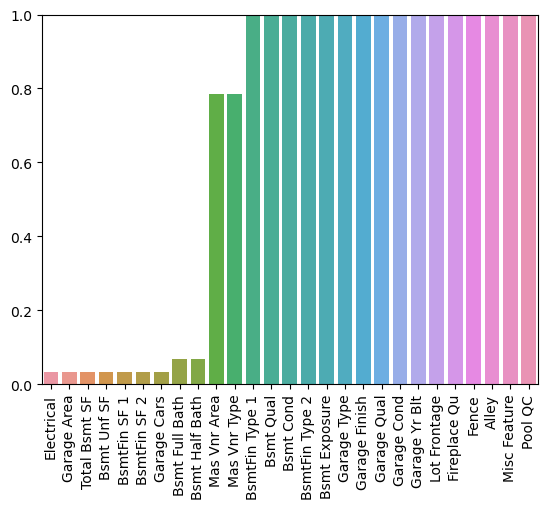

In [12]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

#### Lets find which rows have this small %tages

In [13]:
percent_nan[percent_nan <1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [14]:
100/len(df)

0.0341646737273659

* This means only one row those has a null value in the columns that have 0.0341
* But we are not sure wherthe one row combines, multiple null values or is it one row for one null value

#### Let's combine electrical and garage area and see if they share the same row of null values

In [15]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

#### How many rows haven't got a basement half bath 

In [16]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


* Since some of the missing data are inter woven
* Let's drop the two feature('Electrical' and 'Garage Cars') and see if more rows will go

In [17]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [18]:
percent_nan = percent_missing(df)

In [19]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

* Visualize the data again

(0.0, 1.0)

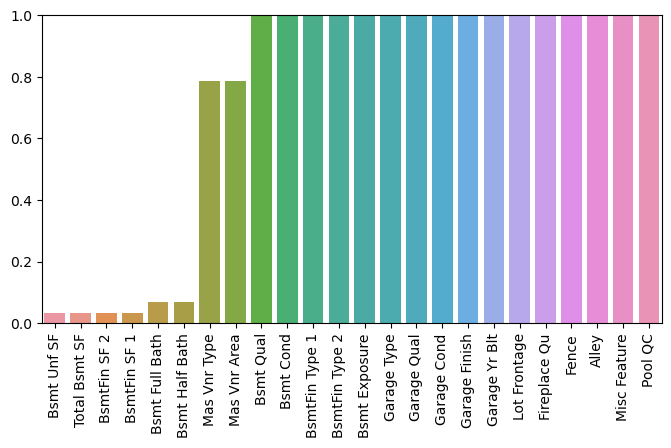

In [20]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

* We can see that some houses don't have some basement features in them

In [21]:
bsmt_num_cols = ["BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF","Bsmt Half Bath","Bsmt Full Bath"]
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

* The above code grab a group of columns(having null numerical values in them) related to some basement features
* Seeking advice from people with the domain knowledge suggest that those houses.

In [24]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

* The above code is for the colunns that have an "object" datatype
* We fill them with "none"

#### Let us see if we still have null values for basement full bath?

In [25]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


* Visualize again

(0.0, 1.0)

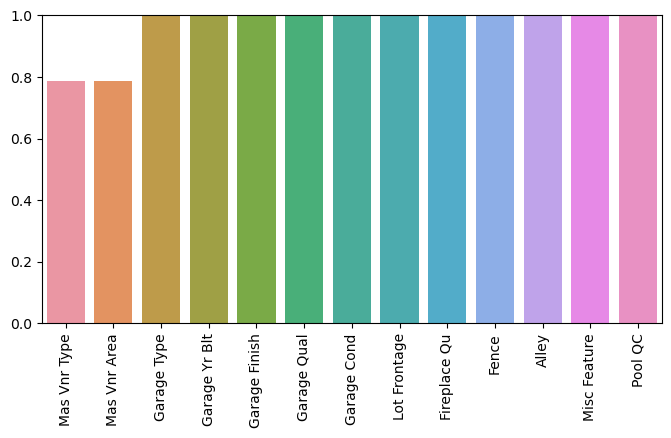

In [26]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

We can now fill the "Mass Vnr Type" and "Mass Vnr Area" with "None" and 0 respectively

In [27]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [28]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

Repeat our percent_nan function

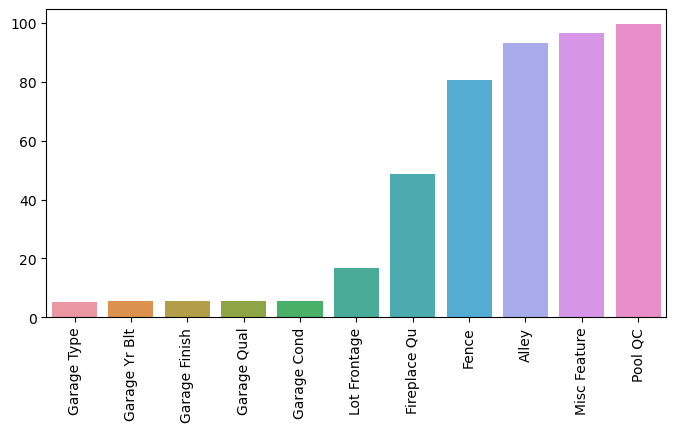

In [29]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Dealing with missing Vaues that are greater than 1%
Because Values greater than one can affect the amount of the data we need for good model performance
* We either fill in the missing values
* Or drop the feature columns

#### We should consider dropping a feature column if many rows are NaN

In [33]:
# create a dataframe of columns that have missing garage features

gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [34]:
# Fill the dataframe with "None" object

df[gar_str_cols] = df[gar_str_cols].fillna('None')

Visualize again using our percent_nan function

In [36]:
percent_nan = percent_missing(df) # Applying our percent_nan function on the updated dataframe

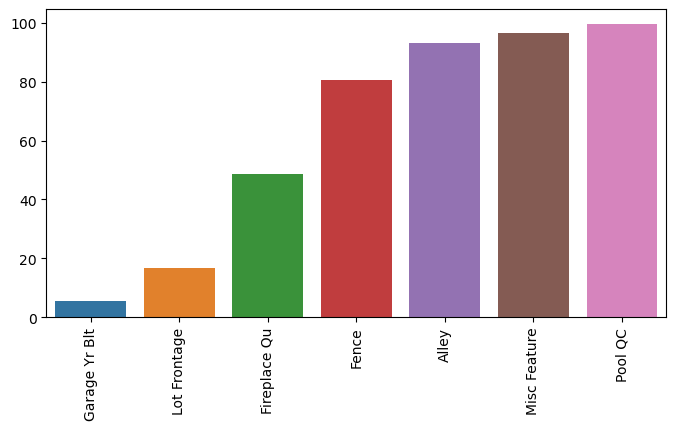

In [37]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Let us consider filling Garage year built with 0

In [40]:
# avg_gr_yr = df["Garage Yr Blt"].mean()    Incase an average year may be concsidered
# For now I think Zero will be a good decision

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

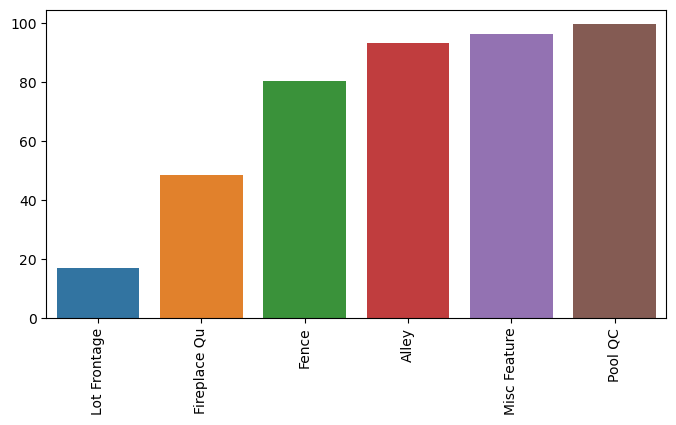

In [41]:
percent_nan = percent_missing(df)
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Drop the columns that have high percentage of null values, because filling them with another value means feeding the model with an entirely false data.

In [42]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'], axis=1)

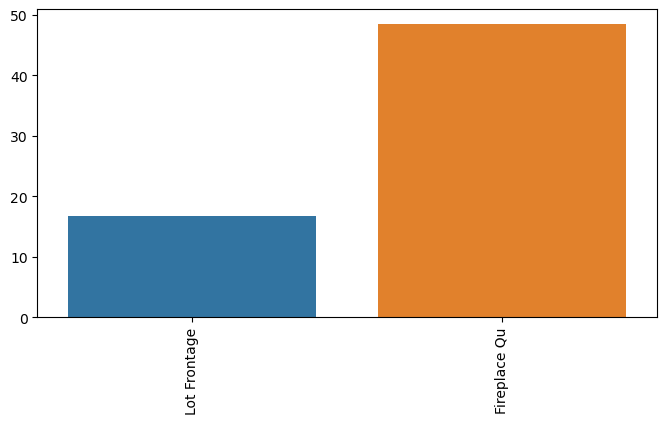

In [43]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### At this point;
* The missing data is not too little to drop the rows
* and not too much to drop the columns
* Let us expolre the columns' data

In [44]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

Since thecolumn consist of object datatype, we can fil the missing rows with "None"

In [45]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Then the last standing column

In [48]:
df["Lot Frontage"].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 128, dtype: int64

Since it's a numeric data, We may need to use a statistical(e.g mean) method to fill in the missing rows
* But we can not take average of the whole city, it should be an averge of each neighborhood


* Neighbourhood: Physical location within Ames city limits
* LotFrontage: Linear feet of street connected to property

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

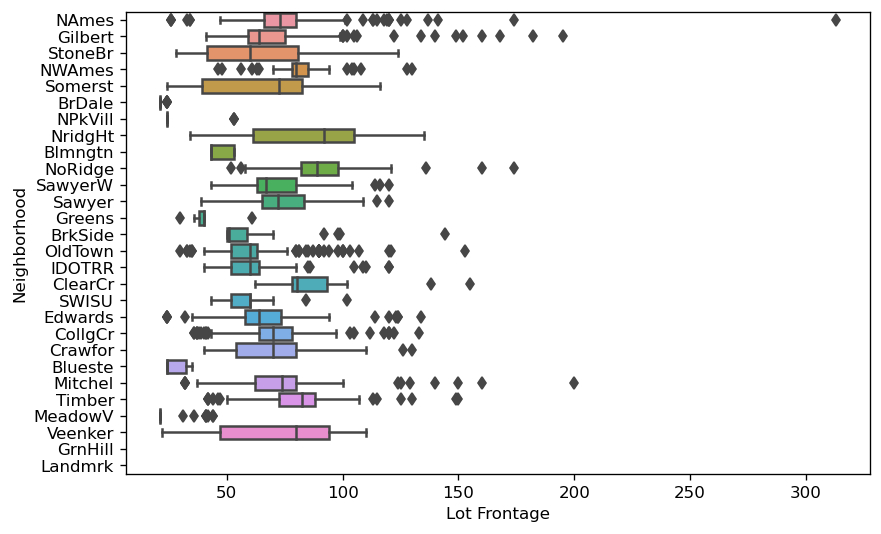

In [51]:
plt.figure(figsize=(8,5),dpi=120)
sns.boxplot(x='Lot Frontage',y='Neighborhood', data=df,orient='h')

* Find the mean Value for each Neighborhood
* Apply the mean in each Neighborhood to its missing data

In [53]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [54]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [57]:
df['Lot Frontage'].isnull().sum()

3

* Three rows are having null values in the 'Lot Frontage' column
* We can fill it with a Zero

In [59]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
Check for missing null values in our dataframe

In [61]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

* This shows that we don't have a missing value in our Dataframe
* We therefore need to create a check point by saving this newest DF

### Save our updated dataframe

In [63]:
df.to_csv('Ames_NO_Missing_Data.csv')

##  Check_point_TWO

# Categorical data encoding

Categorical data encoding is the process of converting categorical data, which consists of non-numeric values such as names, labels, or categories, into numerical data that can be used for machine learning algorithms. This is necessary because most machine learning algorithms are designed to work with numerical data, and cannot directly process categorical data.

Our dataset consist of significant amount of categorical data, so we need to apply this technique to process the data in preparation for the machine learning process.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Let us load the information about our dataset

It's a comprehensive text file that detailed all the information we need about the data we are using in this project

In [66]:
with open('DATA/Ames_Housing_Feature_Description.txt','r') as f:
    print (f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### We are now ready to load our csv file we created at check_point_TWO

In [67]:
df = pd.read_csv('DATA/Ames_NO_Missing_Data.csv')

In [68]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [69]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2920    80
2921    20
2922    85
2923    20
2924    60
Name: MS SubClass, Length: 2925, dtype: int64

* From the metadata we can see that this cloumn is asigned numeric values which are  representing a string data
* The model may think that the House with 40 is twice the value of the house with 20
* And this is not what the values mean
* So What we should do is to convert those numeric values to string data.

In [70]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

* We are going to convert the columns with string feature in to dummy Variables
* Using the pd.get_dummies(direction)

In [71]:
df.select_dtypes(include='object')  # We are selecting columns with string data

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


We can see that 'MS SubClass' is now a string value column

#### We are going to create two dataframes, one for object/str data and one for numeric data

In [72]:
my_object_df = df.select_dtypes(include='object') # Str dataframe

In [73]:
my_numeric_df = df.select_dtypes(exclude='object') # numeric dataframe

 Create a dummy dataframe for str/object columns below

In [74]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [75]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


The getdummies pandas function uses One-Hot Encoding.

In this method, each categorical value is converted into a binary vector of zeros and ones.

### We would now create our final dataframe by concatenating the "df_object_dummies" and "my_numeric_df"

In [76]:
final_df = pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [77]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


#### Let us see the correlation between the final dataframe and the SalePrice

In [79]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

### Create the final csv file ready for model training

In [80]:
df.to_csv('Cleaned_final_df.csv')